In [1]:
import random


def get_vocab():
    node_numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    node_lowers = [
        'q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'a', 's', 'd', 'f',
        'g', 'h', 'j', 'k', 'l', 'z', 'x', 'c', 'v', 'b', 'n', 'm'
    ]
    node_upper = [
        'Q', 'W', 'E', 'R', 'T', 'Y', 'U', 'I', 'O', 'P', 'A', 'S', 'D', 'F',
        'G', 'H', 'J', 'K', 'L', 'Z', 'X', 'C', 'V', 'B', 'N', 'M'
    ]

    nodes = node_numbers + node_lowers + node_upper + ['$']

    edges = []
    for i in range(100):
        n1 = random.choice(node_numbers)
        n2 = random.choice(node_numbers)
        edges.append((n1, n2))

    for i in range(100):
        n1 = random.choice(node_lowers)
        n2 = random.choice(node_lowers)
        edges.append((n1, n2))

    for i in range(200):
        n1 = random.choice(node_upper)
        n2 = random.choice(node_upper)
        edges.append((n1, n2))

    for i in range(50):
        n1 = random.choice(nodes)
        n2 = random.choice(nodes)
        edges.append((n1, n2))

    random.shuffle(edges)

    #编码
    nodes = {name: i for i, name in enumerate(nodes)}
    edges = [(nodes[i[0]], nodes[i[1]]) for i in edges]

    return nodes, edges


nodes, edges = get_vocab()

print(nodes)
print(edges)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'q': 10, 'w': 11, 'e': 12, 'r': 13, 't': 14, 'y': 15, 'u': 16, 'i': 17, 'o': 18, 'p': 19, 'a': 20, 's': 21, 'd': 22, 'f': 23, 'g': 24, 'h': 25, 'j': 26, 'k': 27, 'l': 28, 'z': 29, 'x': 30, 'c': 31, 'v': 32, 'b': 33, 'n': 34, 'm': 35, 'Q': 36, 'W': 37, 'E': 38, 'R': 39, 'T': 40, 'Y': 41, 'U': 42, 'I': 43, 'O': 44, 'P': 45, 'A': 46, 'S': 47, 'D': 48, 'F': 49, 'G': 50, 'H': 51, 'J': 52, 'K': 53, 'L': 54, 'Z': 55, 'X': 56, 'C': 57, 'V': 58, 'B': 59, 'N': 60, 'M': 61, '$': 62}
[(16, 25), (60, 37), (2, 7), (9, 3), (8, 6), (55, 41), (51, 59), (35, 58), (61, 44), (51, 44), (61, 38), (14, 33), (50, 12), (13, 19), (42, 47), (55, 41), (58, 43), (47, 44), (20, 19), (4, 49), (7, 4), (61, 58), (46, 44), (35, 20), (18, 23), (60, 44), (36, 50), (33, 16), (5, 5), (16, 19), (18, 24), (3, 9), (50, 50), (9, 4), (29, 32), (9, 2), (53, 49), (37, 51), (38, 44), (22, 37), (39, 51), (7, 7), (44, 56), (49, 49), (36, 42), (3, 0), (5

In [2]:
import torch


def get_datas():
    samples = random.sample(edges, 4)

    positive = []
    negative = []
    for i in samples:
        n1, n2 = i
        while (n1, n2) in edges:
            n1 = random.randint(0, len(nodes) - 1)
        negative.append((n1, n2))

        n1, n2 = i
        while (n1, n2) in edges:
            n2 = random.randint(0, len(nodes) - 1)
        negative.append((n1, n2))

        positive.append(i)
        positive.append(i)

    positive = torch.LongTensor(positive)
    negative = torch.LongTensor(negative)

    return positive, negative


positive, negative = get_datas()

positive, negative

(tensor([[39, 51],
         [39, 51],
         [48, 50],
         [48, 50],
         [ 7,  0],
         [ 7,  0],
         [36, 58],
         [36, 58]]),
 tensor([[14, 51],
         [39,  8],
         [ 8, 50],
         [48,  0],
         [11,  0],
         [ 7, 43],
         [24, 58],
         [36, 36]]))

In [3]:
def get_cos_loss(positive, negative):
    #positive -> [8, 2, 2]
    #negative -> [8, 2, 2]

    #[8, 1, 2]
    positive_n1 = positive[:, 0].unsqueeze(dim=1)
    #[8, 2, 1]
    positive_n2 = positive[:, 1].unsqueeze(dim=2)

    #[8, 1, 2],[8, 2, 1] -> [8]
    loss_positive = torch.bmm(positive_n1, positive_n2).squeeze()

    #[8, 1, 2]
    negative_n1 = negative[:, 0].unsqueeze(dim=1)
    #[8, 2, 1]
    negative_n2 = negative[:, 1].unsqueeze(dim=2)

    #[8, 1, 2],[8, 2, 1] -> [8]
    loss_negative = torch.bmm(negative_n1, -negative_n2).squeeze()

    #[8, 2] -> [8]
    loss_positive = loss_positive.sigmoid().log()

    #[8, 2] -> [8]
    loss_negative = loss_negative.sigmoid().log()

    return -(loss_positive + loss_negative).mean()


a, b = torch.randn(8, 2, 2), torch.randn(8, 2, 2)
get_cos_loss(a, b)

tensor(0.8960)

In [4]:
class Model(torch.nn.Module):

    def __init__(self):
        super().__init__()

        #V是词汇量
        self.embed = torch.nn.Embedding(num_embeddings=len(nodes),
                                        embedding_dim=2)

        #初始化参数
        self.embed.weight.data.uniform_(-0.01, 0.01)

    def forward(self, positive, negative):
        #编码
        #[8, 6] -> [8, 6, 2]
        positive = self.embed(positive)

        #[8, 12] -> [8, 12, 2]
        negative = self.embed(negative)

        return get_cos_loss(positive, negative)


model = Model()

model(positive, negative)

tensor(1.3863, grad_fn=<NegBackward0>)

In [5]:
def test(test_words):
    embed = model.embed.weight.data.clone()

    for word in test_words:
        x = embed[nodes[word]]
        score = torch.nn.functional.cosine_similarity(x, embed)
        topk = score.topk(k=5).indices
        topk = [list(nodes.keys())[k] for k in topk]
        print(word, topk)


test(['a', 'g', '1', '5', 'Q', 'H'])

a ['a', 'b', '9', 'N', 'O']
g ['g', 'f', 'Q', 'l', '3']
1 ['1', '5', 'R', 'l', 'G']
5 ['5', '1', 'R', 'l', 'G']
Q ['Q', 'f', '3', 'g', 'u']
H ['H', 'P', 'r', 'M', 'i']


In [6]:
def train():
    global model
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    loss_sum = 0
    for epoch in range(20001):
        positive, negative = get_datas()
        positive = positive.to(device)
        negative = negative.to(device)

        loss = model(positive, negative)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()

        if epoch % 5000 == 0:
            print(epoch, loss_sum)
            test(['a', 'g', '1', '5', 'Q', 'H'])
            loss_sum = 0

    model = model.cpu()


train()

0 1.386298656463623
a ['a', 'r', 'H', 'P', 'M']
g ['g', 'f', 'Q', 'l', '3']
1 ['1', 'R', 'l', 'G', 'o']
5 ['5', 'I', 'K', 'p', 'o']
Q ['Q', 'f', '3', 'g', 'u']
H ['H', 'P', 'r', 'M', 's']
5000 5172.9236615002155
a ['a', 'k', 'g', 'r', 'y']
g ['g', 'k', 'a', 'r', 'y']
1 ['1', '3', '9', '2', '6']
5 ['5', '7', '4', '0', '6']
Q ['Q', 'U', 'N', 'D', 'O']
H ['H', 'G', 'I', 'Z', 'N']
10000 4638.480019137263
a ['a', 'k', 'v', 'q', 'g']
g ['g', 'v', 'k', 'a', 'h']
1 ['1', '2', '9', '3', '0']
5 ['5', '4', '6', '7', '0']
Q ['Q', 'T', 'I', 'L', 'D']
H ['H', 'D', 'Z', 'Q', 'P']
15000 4687.34239295125
a ['a', 'p', 'k', 'q', 'o']
g ['g', 'b', 'h', 'f', 'd']
1 ['1', '3', '7', '9', '0']
5 ['5', '6', '4', '0', '7']
Q ['Q', 'P', 'T', 'I', 'G']
H ['H', 'L', 'U', 'D', 'Y']
20000 4639.494001954794
a ['a', 'h', 'u', 'y', 'g']
g ['g', 'v', 'c', 'h', 'a']
1 ['1', '7', '3', '2', '0']
5 ['5', '6', '4', '0', '3']
Q ['Q', 'M', 'P', 'T', 'G']
H ['H', 'D', 'I', 'G', 'L']


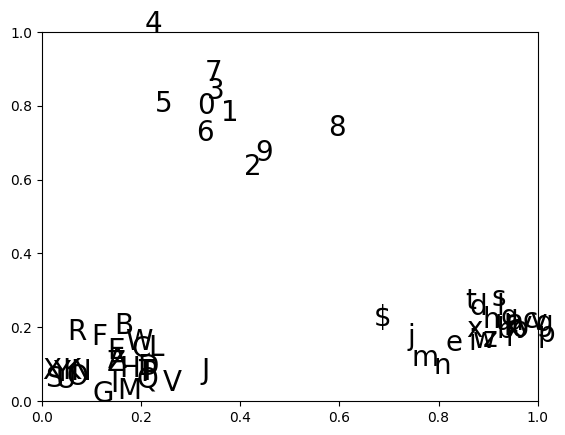

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline


def show():

    #缩放到0-1空间
    W = model.embed.weight.data.clone()
    W -= W.min(dim=0).values
    W /= W.max(dim=0).values

    for word, x in nodes.items():
        x = W[x]
        plt.text(x[0], x[1], word, fontsize=20)

    plt.show()


show()